In [1]:
using Plots, DifferentialEquations, LaTeXStrings

In [2]:

## Constants
const C_m     = 1       # μF/cm², membrane capacitance
const G_NaMax = 120     # mS/cm², maximum conductivity of Na channel
const G_KMax  = 36      # mS/cm², maximum conductivity of K channel
const G_L     = 0.3     # mS/cm², leak conductivity
const V_r  = -65        # mV, resting potential
const V_Na =  50        # mV, Nernst voltage for Na 
const V_K  = -77        # mV, Nernst voltage for K
const V_L  = -54.387    # mV, Nernst voltage for leak

## Function Definitions
α_n(dV) = (0.1 - 0.01*dV)/(exp(1 - 0.1*dV)- 1)
β_n(dV) = 0.125/(exp(0.0125*dV))
α_m(dV) = (2.5 - 0.1*dV)/(exp(2.5 - 0.1*dV)- 1)
β_m(dV) = 4/(exp(dV/18))
α_h(dV) = 0.07/(exp(0.05*dV))
β_h(dV) = 1/(exp(3 - 0.1*dV)+ 1)

# Steady states


n_∞(dV) = α_n(dV)/(α_n(dV)+β_n(dV))
m_∞(dV) = α_m(dV)/(α_m(dV)+β_m(dV))
h_∞(dV) = α_h(dV)/(α_h(dV)+β_h(dV))

h_∞ (generic function with 1 method)

In [3]:
# Injected Current Function
I_inj(t) = 10 * (5 < t < 30)
 
G_Ka(n) = G_KMax  .* (n).^4


function HH_model(u,p,t)
    n, m, h, Vm = u 
    
    # Update transfer rate coefficients, n, m, and h
    V_diff = Vm - V_r         # difference between the rest voltage and membrane voltage
    dn = α_n(V_diff)*(1-n) - β_n(V_diff)*n
    dm = α_m(V_diff)*(1-m) - β_m(V_diff)*m
    dh = α_h(V_diff)*(1-h) - β_h(V_diff)*h
    
    # Update cell membrane voltage, Vm
    G_K  = G_KMax  * n^4       # Sodium conductance
    G_Na = G_NaMax * h * m^3   # Potasium conductance
    dVm = (I_inj(t) + (V_Na - Vm)*G_Na + (V_K - Vm)*G_K + (V_L - Vm)*G_L)/C_m 

    [dn; dm; dh; dVm]
    
       

end

## Run Model:
u0 = [n_∞(0); m_∞(0) ; h_∞(0); -65.1]
tspan = (0.0,50.0)
prob = ODEProblem(HH_model, u0, tspan)
sol = solve(prob, saveat=0.01);

In [4]:
G_Na(h,m) = G_NaMax * h * m^3

o = [23:45]
p= [2:34]


1-element Vector{UnitRange{Int64}}:
 2:34

In [5]:
G_Na(o,p)

LoadError: MethodError: no method matching ^(::Vector{UnitRange{Int64}}, ::Int64)
[0mClosest candidates are:
[0m  ^([91m::Union{AbstractChar, AbstractString}[39m, ::Integer) at C:\Users\ceci_\AppData\Local\Programs\Julia-1.7.2\share\julia\base\strings\basic.jl:721
[0m  ^([91m::Union{AbstractAlgebra.Generic.PuiseuxSeriesFieldElem{T}, AbstractAlgebra.Generic.PuiseuxSeriesRingElem{T}}[39m, ::Int64) where T<:AbstractAlgebra.RingElement at C:\Users\ceci_\.julia\packages\AbstractAlgebra\nmiq9\src\generic\PuiseuxSeries.jl:509
[0m  ^([91m::Union{AbstractAlgebra.Generic.LaurentSeriesFieldElem{T}, AbstractAlgebra.Generic.LaurentSeriesRingElem{T}}[39m, ::Int64) where T<:AbstractAlgebra.RingElement at C:\Users\ceci_\.julia\packages\AbstractAlgebra\nmiq9\src\generic\LaurentSeries.jl:988
[0m  ...

In [6]:
G_Na(2,3)

6480

In [59]:
G_Ka(9)

236196

In [37]:
α_n(6)

0.0813297912687895

In [7]:
HH_model([-17,2,-3,4],6,7)

4-element Vector{Float64}:
 11.546147005392857
 -4.6277907307177815
  2.9493678609836267
 -2.436797235161e8

In [10]:
I_inj(t) = 10 * (5 < t < 30)

I_inj (generic function with 1 method)

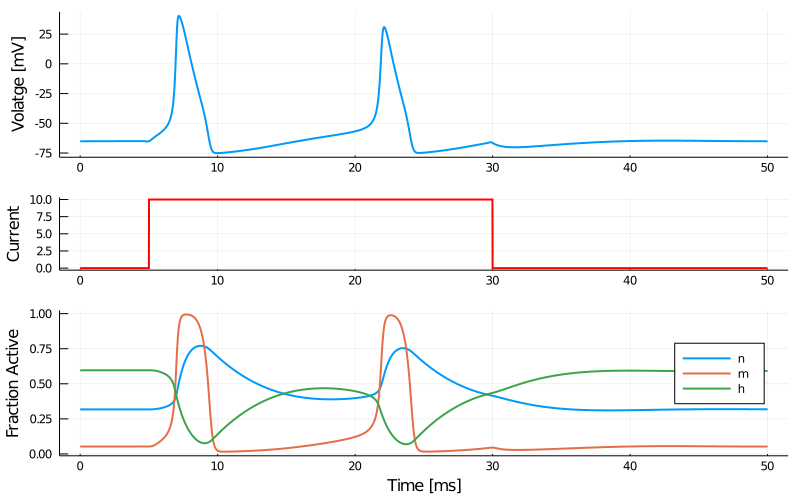

In [8]:
## Plotting
p1 = plot(sol.t, sol[4,:], legend=false, ylabel="Volatge [mV]")
p2 = plot(sol.t, I_inj.(sol.t), legend=false, lc=:red, ylabel="Current")
p3 = plot(sol.t, sol[1:3,:]', label=["n" "m" "h"], legend=:topright, 
          xlabel="Time [ms]", ylabel="Fraction Active")
##p4= plot(sol.t, G_K.(sol.t))



l = grid(3, 1, heights=[0.4, 0.2 ,0.4])
plot(p1, p2, p3, layout = l, size=(800,500), lw=2)

In [60]:
prueba(t)= 10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)


prueba(450)


0

In [33]:
 DeltaT = 0.01   # ms
    maxT = 50.0     # ms    
    V0 = 0.0       # mV
    gNa = 120.0     # mS/cm2
    gK = 36.0
    gL = 0.3
    Cm = 1.0        # micro F/cm2
    ENa = 115.0    # Utilizando la convensión original de Hodkin-Huxley
    EK = -12.0
    EL = 10.613

V = 10



t0=10.0
tfin=16.0
current=6.5

function Iext(t)
        
     Iext= gNa*gK*t
        
        
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
   
    end
 

LoadError: cannot assign a value to variable Plots.current from module Main

In [61]:
parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613,
    
"V" => 10,
"t0"=> 10.0,
"tfin"=> 16.0,
"current"=> 6.5)




function Iext(t)
        

if (t>t0) & (t<tfin)
            return 6.5 # micro A/cm2
        else
            return 0
        end
 
    
    
    end
 

Iext (generic function with 1 method)

In [62]:
Iext(14)

6.5